In [1]:
import numpy as np
import pandas as pd

In [30]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

C:\Users\munol\AppData\Local\Programs\Python\Python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [24]:
import pickle
import gzip
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
f = gzip.open('mnist.pkl.gz', 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
train_set, valid_set, test_set = u.load()
f.close()

In [7]:
train_set

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([5, 0, 4, ..., 8, 4, 8], dtype=int64))

In [11]:
def get_images(training_set):
    """ Return a list containing the images from the MNIST data
    set. Each image is represented as a 2-d numpy array."""
    flattened_images = training_set[0]
    return [np.reshape(f, (-1, 28)) for f in flattened_images]

In [12]:
#### Plotting
def plot_images_together(images):
    """ Plot a single image containing all six MNIST images, one after
    the other.  Note that we crop the sides of the images so that they
    appear reasonably close together."""
    fig = plt.figure()
    images = [image[:, 3:25] for image in images]
    image = np.concatenate(images, axis=1)
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(image, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()

def plot_10_by_10_images(images):
    """ Plot 100 MNIST images in a 10 by 10 table. Note that we crop
    the images so that they appear reasonably close together.  The
    image is post-processed to give the appearance of being continued."""
    fig = plt.figure()
    images = [image[3:25, 3:25] for image in images]
    #image = np.concatenate(images, axis=1)
    for x in range(10):
        for y in range(10):
            ax = fig.add_subplot(10, 10, 10*y+x)
            ax.matshow(images[10*y+x], cmap = matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

def plot_images_separately(images):
    "Plot the six MNIST images separately."
    fig = plt.figure()
    for j in xrange(1, 7):
        ax = fig.add_subplot(1, 6, j)
        ax.matshow(images[j-1], cmap = matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.show()

def plot_mnist_digit(image):
    """ Plot a single MNIST image."""
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(image, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()

def plot_2_and_1(images):
    "Plot a 2 and a 1 image from the MNIST set."
    fig = plt.figure()
    ax = fig.add_subplot(1, 2, 1)
    ax.matshow(images[5], cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    ax = fig.add_subplot(1, 2, 2)
    ax.matshow(images[3], cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()

def plot_top_left(image):
    "Plot the top left of ``image``."
    image[14:,:] = np.zeros((14,28))
    image[:,14:] = np.zeros((28,14))
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(image, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()

def plot_bad_images(images):
    """This takes a list of images misclassified by a pretty good
    neural network --- one achieving over 93 percent accuracy --- and
    turns them into a figure."""
    bad_image_indices = [8, 18, 33, 92, 119, 124, 149, 151, 193, 233, 241, 247, 259, 300, 313, 321, 324, 341, 349, 352, 359, 362, 381, 412, 435, 445, 449, 478, 479, 495, 502, 511, 528, 531, 547, 571, 578, 582, 597, 610, 619, 628, 629, 659, 667, 691, 707, 717, 726, 740, 791, 810, 844, 846, 898, 938, 939, 947, 956, 959, 965, 982, 1014, 1033, 1039, 1044, 1050, 1055, 1107, 1112, 1124, 1147, 1181, 1191, 1192, 1198, 1202, 1204, 1206, 1224, 1226, 1232, 1242, 1243, 1247, 1256, 1260, 1263, 1283, 1289, 1299, 1310, 1319, 1326, 1328, 1357, 1378, 1393, 1413, 1422, 1435, 1467, 1469, 1494, 1500, 1522, 1523, 1525, 1527, 1530, 1549, 1553, 1609, 1611, 1634, 1641, 1676, 1678, 1681, 1709, 1717, 1722, 1730, 1732, 1737, 1741, 1754, 1759, 1772, 1773, 1790, 1808, 1813, 1823, 1843, 1850, 1857, 1868, 1878, 1880, 1883, 1901, 1913, 1930, 1938, 1940, 1952, 1969, 1970, 1984, 2001, 2009, 2016, 2018, 2035, 2040, 2043, 2044, 2053, 2063, 2098, 2105, 2109, 2118, 2129, 2130, 2135, 2148, 2161, 2168, 2174, 2182, 2185, 2186, 2189, 2224, 2229, 2237, 2266, 2272, 2293, 2299, 2319, 2325, 2326, 2334, 2369, 2371, 2380, 2381, 2387, 2393, 2395, 2406, 2408, 2414, 2422, 2433, 2450, 2488, 2514, 2526, 2548, 2574, 2589, 2598, 2607, 2610, 2631, 2648, 2654, 2695, 2713, 2720, 2721, 2730, 2770, 2771, 2780, 2863, 2866, 2896, 2907, 2925, 2927, 2939, 2995, 3005, 3023, 3030, 3060, 3073, 3102, 3108, 3110, 3114, 3115, 3117, 3130, 3132, 3157, 3160, 3167, 3183, 3189, 3206, 3240, 3254, 3260, 3280, 3329, 3330, 3333, 3383, 3384, 3475, 3490, 3503, 3520, 3525, 3559, 3567, 3573, 3597, 3598, 3604, 3629, 3664, 3702, 3716, 3718, 3725, 3726, 3727, 3751, 3752, 3757, 3763, 3766, 3767, 3769, 3776, 3780, 3798, 3806, 3808, 3811, 3817, 3821, 3838, 3848, 3853, 3855, 3869, 3876, 3902, 3906, 3926, 3941, 3943, 3951, 3954, 3962, 3976, 3985, 3995, 4000, 4002, 4007, 4017, 4018, 4065, 4075, 4078, 4093, 4102, 4139, 4140, 4152, 4154, 4163, 4165, 4176, 4199, 4201, 4205, 4207, 4212, 4224, 4238, 4248, 4256, 4284, 4289, 4297, 4300, 4306, 4344, 4355, 4356, 4359, 4360, 4369, 4405, 4425, 4433, 4435, 4449, 4487, 4497, 4498, 4500, 4521, 4536, 4548, 4563, 4571, 4575, 4601, 4615, 4620, 4633, 4639, 4662, 4690, 4722, 4731, 4735, 4737, 4739, 4740, 4761, 4798, 4807, 4814, 4823, 4833, 4837, 4874, 4876, 4879, 4880, 4886, 4890, 4910, 4950, 4951, 4952, 4956, 4963, 4966, 4968, 4978, 4990, 5001, 5020, 5054, 5067, 5068, 5078, 5135, 5140, 5143, 5176, 5183, 5201, 5210, 5331, 5409, 5457, 5495, 5600, 5601, 5617, 5623, 5634, 5642, 5677, 5678, 5718, 5734, 5735, 5749, 5752, 5771, 5787, 5835, 5842, 5845, 5858, 5887, 5888, 5891, 5906, 5913, 5936, 5937, 5945, 5955, 5957, 5972, 5973, 5985, 5987, 5997, 6035, 6042, 6043, 6045, 6053, 6059, 6065, 6071, 6081, 6091, 6112, 6124, 6157, 6166, 6168, 6172, 6173, 6347, 6370, 6386, 6390, 6391, 6392, 6421, 6426, 6428, 6505, 6542, 6555, 6556, 6560, 6564, 6568, 6571, 6572, 6597, 6598, 6603, 6608, 6625, 6651, 6694, 6706, 6721, 6725, 6740, 6746, 6768, 6783, 6785, 6796, 6817, 6827, 6847, 6870, 6872, 6926, 6945, 7002, 7035, 7043, 7089, 7121, 7130, 7198, 7216, 7233, 7248, 7265, 7426, 7432, 7434, 7494, 7498, 7691, 7777, 7779, 7797, 7800, 7809, 7812, 7821, 7849, 7876, 7886, 7897, 7902, 7905, 7917, 7921, 7945, 7999, 8020, 8059, 8081, 8094, 8095, 8115, 8246, 8256, 8262, 8272, 8273, 8278, 8279, 8293, 8322, 8339, 8353, 8408, 8453, 8456, 8502, 8520, 8522, 8607, 9009, 9010, 9013, 9015, 9019, 9022, 9024, 9026, 9036, 9045, 9046, 9128, 9214, 9280, 9316, 9342, 9382, 9433, 9446, 9506, 9540, 9544, 9587, 9614, 9634, 9642, 9645, 9700, 9716, 9719, 9729, 9732, 9738, 9740, 9741, 9742, 9744, 9745, 9749, 9752, 9768, 9770, 9777, 9779, 9792, 9808, 9831, 9839, 9856, 9858, 9867, 9879, 9883, 9888, 9890, 9893, 9905, 9944, 9970, 9982]
    n = len(bad_image_indices)
    bad_images = [images[j] for j in bad_image_indices]
    fig = plt.figure(figsize=(10, 15))
    for j in xrange(1, n+1):
        ax = fig.add_subplot(25, 125, j)
        ax.matshow(bad_images[j-1], cmap = matplotlib.cm.binary)
        ax.set_title(str(bad_image_indices[j-1]))
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.subplots_adjust(hspace = 1.2)
    plt.show()

def plot_really_bad_images(images):
    """This takes a list of the worst images from plot_bad_images and
    turns them into a figure."""
    really_bad_image_indices = [
        324, 582, 659, 726, 846, 956, 1124, 1393,
        1773, 1868, 2018, 2109, 2654, 4199, 4201, 4620, 5457, 5642]
    n = len(really_bad_image_indices)
    really_bad_images = [images[j] for j in really_bad_image_indices]
    fig = plt.figure(figsize=(10, 2))
    for j in xrange(1, n+1):
        ax = fig.add_subplot(2, 9, j)
        ax.matshow(really_bad_images[j-1], cmap = matplotlib.cm.binary)
        #ax.set_title(str(really_bad_image_indices[j-1]))
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.show()

def plot_features(image):
    "Plot the top right, bottom left, and bottom right of ``image``."
    image_1, image_2, image_3 = np.copy(image), np.copy(image), np.copy(image)
    image_1[:,:14] = np.zeros((28,14))
    image_1[14:,:] = np.zeros((14,28))
    image_2[:,14:] = np.zeros((28,14))
    image_2[:14,:] = np.zeros((14,28))
    image_3[:14,:] = np.zeros((14,28))
    image_3[:,:14] = np.zeros((28,14))
    fig = plt.figure()
    ax = fig.add_subplot(1, 3, 1)
    ax.matshow(image_1, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    ax = fig.add_subplot(1, 3, 2)
    ax.matshow(image_2, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    ax = fig.add_subplot(1, 3, 3)
    ax.matshow(image_3, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()

def plot_rotated_image(image):
    """ Plot an MNIST digit and a version rotated by 10 degrees."""
    # Do the initial plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(image, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()
    # Set up the rotated image.  There are fast matrix techniques
    # for doing this, but we'll do a pedestrian approach
    rot_image = np.zeros((28,28))
    theta = 15*np.pi/180 # 15 degrees
    def to_xy(j, k):
        # Converts from matrix indices to x, y co-ords, using the
        # 13, 14 matrix entry as the origin
        return (k-13, -j+14) # x range: -13..14, y range: -13..14
    def to_jk(x, y):
        # Converts from x, y co-ords to matrix indices
        return (-y+14, x+13)
    def image_value(image, x, y):
        # returns the value of the image at co-ordinate x, y
        # (Note that this would be better done as a closure, if Pythong
        # supported closures, so that image didn't need to be passed)
        j, k = to_jk(x, y)
        return image[j, k]
    # Element by element, figure out what should be in the rotated
    # image.  We simply take each matrix entry, figure out the
    # corresponding x, y co-ordinates, rotate backward, and then
    # average the nearby matrix elements.  It's not perfect, and it's
    # not fast, but it works okay.
    for j in range(28):
        for k in range(28):
            x, y = to_xy(j, k)
            # rotate by -theta
            x1 = np.cos(theta)*x + np.sin(theta)*y
            y1 = -np.sin(theta)*x + np.cos(theta)*y
            # Nearest integer x entries are x2 and x2+1. delta_x 
            # measures how to interpolate
            x2 = np.floor(x1)
            delta_x = x1-x2
            # Similarly for y
            y2 = np.floor(y1)
            delta_y = y1-y2
            # Check if we're out of bounds, and if so continue to next entry
            # This will miss a boundary row and layer, but that's okay,
            # MNIST digits usually don't go that near the boundary.
            if x2 < -13 or x2 > 13 or y2 < -13 or y2 > 13: continue
            # If we're in bounds, average the nearby entries.
            value \
                = (1-delta_x)*(1-delta_y)*image_value(image, x2, y2)+\
                (1-delta_x)*delta_y*image_value(image, x2, y2+1)+\
                delta_x*(1-delta_y)*image_value(image, x2+1, y2)+\
                delta_x*delta_y*image_value(image, x2+1, y2+1)
            # Rescale the value by a hand-set fudge factor.  This
            # seems to be necessary because the averaging doesn't
            # quite work right.  The fudge-factor should probably be
            # theta-dependent, but I've set it by hand.  
            rot_image[j, k] = 1.3*value
    plot_mnist_digit(rot_image)

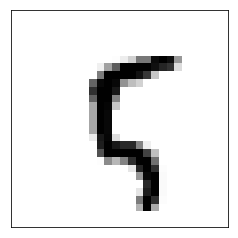

In [29]:
images = get_images(train_set)
plot_mnist_digit(images[100])

In [31]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11493376/11490434 [==============================] - 15s 1us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 95s 2ms/step - loss: 0.2615 - acc: 0.9209 - val_loss: 0.0577 - val_acc: 0.9813
Epoch 2/12
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0888 - acc: 0.9742 - val_loss: 0.0414 - val_acc: 0.9861
Epoch 3/12
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0660 - acc: 0.9799 - val_loss: 0.0394 - val_acc: 0.9870
Epoch 4/12
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0543 - acc: 0.9838 - val_loss: 0.0322 - val_acc: 0.9888
Epoch 5/12
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0456 - acc: 0.9862 - val_loss: 0.0310 - val_acc: 0.9892
Epoch 6/12
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0426 - acc: 0.9871 - val_loss: 0.0310 - val

In [35]:
# Feedforward ANN 

x1 = 2
x2 = 3

f = lambda x : 1/(1 + np.exp(-x))
g = lambda x : 1/(1 + np.exp(-x))

w11 = w21 = w31 = w21 = w22 = w32 = 1.
v1 = v2 = v3 = .5
b1 = b2 = b3 = .5
c = 0.5

a1 = x1 * w11 + x2 * w12 + b1
a2 = x1 * w21 + x2 * w22 + b2
a3 = x1 * w31 + x2 * w32 + b3

h1 = f(a1)
h2 = f(a2)
h3 = f(a3)

y = g(v1 * h1 + v2 * h2 + v3 * h3 + c)

print(y)

0.88015457873471


In [41]:
def feed(x, w, v, b_1, b_2):
    a = np.dot(x, w) + b_1
    h = sigmoid(a)
    o = np.dot(h, v) + b_2
    y = sigmoid(o)
    
    return np.array(y)

def sigmoid(sum):
    return 1 / (1 + np.exp(-sum))

In [42]:
x = [2, 3]
w = [[.5, .5, .5], [.5, .5, .5]]
v = [.5, .5, .5]
b_1 = [1., 1., 1.]
b_2 = [.5, .5, .5]

feed(x, w, v, b_1, b_2)

array([0.87610284, 0.87610284, 0.87610284])